In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import json

# LSTM

In [2]:
directory = "./LSTM"
listdir = os.listdir(directory)

data_lstm = {
    "small" : [],
    "medium" : [],
    "large" : []
}

for fname in listdir:
    dataset, idx = fname.replace(".json",'').split('-')
    path = os.path.join(directory, fname)
    data = json.load(open(path, 'r'))

    params = data["params"]
    depth = data["n_layer"]
    width = params // depth

    train_loss = [el["train_loss"] for el in data["history"]]
    val_loss = [el["val_loss"] for el in data["history"]]

    max_train_loss = max(train_loss)
    min_train_loss = min(train_loss)
    mean_train_loss = sum(train_loss)/len(train_loss)

    train_loss_decrement = [data["history"][i]["train_loss"] - data["history"][i+1]["train_loss"] for i in range(len(data["history"])-1)]
    mean_train_loss_decrement = (sum(train_loss_decrement) / len(train_loss_decrement)) / max_train_loss # normalization

    val_loss_decrement = [data["history"][i]["val_loss"] - data["history"][i+1]["val_loss"] for i in range(len(data["history"])-1)]
    mean_val_loss_decrement = (sum(val_loss_decrement) / len(val_loss_decrement)) / max(val_loss) # normalization

    overfit_ratio = abs(mean_train_loss_decrement / mean_val_loss_decrement)

    train_time = [el["train_time"] for el in data["history"]]
    val_time = [el["val_time"] for el in data["history"]]

    mean_train_time = sum(train_time) / len(train_time)
    mean_val_time = sum(val_time) / len(val_time)

    data_lstm[dataset].append({
        "id" : idx,
        "params" : params,
        "depth" : depth,
        "width" : width,
        "max_train_loss" : max_train_loss,
        "min_train_loss" : min_train_loss,
        "mean_train_loss" : mean_train_loss,
        # "mean_train_loss_decrement" : mean_train_loss_decrement,
        # "mean_val_loss_decrement" : mean_val_loss_decrement,
        "overfit_ratio" : overfit_ratio,
        "mean_train_time" : mean_train_time,
        "mean_val_time" : mean_val_time,
        "bidirectional" : data["bidirectional"]
    })

In [3]:
for k, v in data_lstm.items():
    data_lstm[k] = pd.DataFrame(v)

In [4]:
data_lstm["medium"]

,id,params,depth,width,max_train_loss,min_train_loss,mean_train_loss,overfit_ratio,mean_train_time,mean_val_time,bidirectional
0,32,275357,1,275357,2.292302,0.013330,0.364455,1.004020,0.687779,0.075418,True
1,33,139549,1,139549,2.834762,1.971878,2.226750,1.300066,0.591378,0.064718,False
2,34,670621,2,335310,2.249865,0.006442,0.293619,1.004477,0.884502,0.099810,True
3,35,271645,2,135822,2.911456,2.037729,2.301615,1.189606,0.690574,0.071003,False
4,36,1065885,3,355295,2.694834,0.007741,0.390984,1.000908,1.226501,0.136210,True
5,37,403741,3,134580,2.954546,2.124115,2.418514,1.037104,0.729348,0.083894,False
6,38,1461149,4,365287,2.840194,0.052757,0.756077,0.998703,1.477598,0.159668,True
7,39,535837,4,133959,2.959324,2.195323,2.513879,1.050003,0.841146,0.096865,False
8,40,1074973,1,1074973,1.572119,0.005200,0.187060,1.010353,2.107884,0.200345,True
9,41,541213,1,541213,2.677585,1.814671,2.085605,1.389720,1.252696,0.132486,False


In [5]:
import matplotlib.colors as mcolors

def list_matplotlib_colors():
    # Get a dictionary of named colors in Matplotlib
    colors = mcolors.BASE_COLORS
    # Convert the dictionary to a list of color names
    color_list = list(colors.keys())
    return color_list

# Example usage
colors = list_matplotlib_colors()
print(colors)


['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']


In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

def scatter(dfs, x, y, labels, xlabel, ylabel):
    x_range_max = 0
    x_range_min = 0
    for i, (df, label) in enumerate(zip(dfs, labels)):
        plt.scatter(df[x], df[y], alpha=0.5, label=label, color=colors[i%len(colors)])

        if df[x].max() > x_range_max:
            x_range_max = df[x].max()
        if df[x].min() < x_range_min:
            x_range_min = df[x].min()
    
    for i, (df, label) in enumerate(zip(dfs, labels)):
        lr = LinearRegression().fit(X=df[[x]], y=df[y])

        gradient = lr.coef_[0]
        intercept = lr.intercept_

        # Generate x values
        x_ = np.linspace(x_range_min, x_range_max, 100)
        # Calculate y values based on the line equation y = mx + b
        y_ = gradient * x_ + intercept

        plt.plot(x_, y_, linestyle="--", color=colors[i%len(colors)])


    plt.legend()

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# GPT

In [7]:
directory = "./GPT"
listdir = os.listdir(directory)

data_gpt = {
    "small" : [],
    "medium" : [],
    "large" : []
}

for fname in listdir:
    dataset, idx = fname.replace(".json",'').split('-')
    path = os.path.join(directory, fname)
    data = json.load(open(path, 'r'))

    params = data["params"]
    depth = data["n_block"]
    width = params // depth

    train_loss = [el["train_loss"] for el in data["history"]]
    val_loss = [el["val_loss"] for el in data["history"]]

    max_train_loss = max(train_loss)
    min_train_loss = min(train_loss)
    mean_train_loss = sum(train_loss)/len(train_loss)

    train_loss_decrement = [data["history"][i]["train_loss"] - data["history"][i+1]["train_loss"] for i in range(len(data["history"])-1)]
    mean_train_loss_decrement = (sum(train_loss_decrement) / len(train_loss_decrement)) / max_train_loss # normalization

    val_loss_decrement = [data["history"][i]["val_loss"] - data["history"][i+1]["val_loss"] for i in range(len(data["history"])-1)]
    mean_val_loss_decrement = (sum(val_loss_decrement) / len(val_loss_decrement)) / max(val_loss) # normalization

    overfit_ratio = abs(mean_train_loss_decrement / mean_val_loss_decrement)

    train_time = [el["train_time"] for el in data["history"]]
    val_time = [el["val_time"] for el in data["history"]]

    mean_train_time = sum(train_time) / len(train_time)
    mean_val_time = sum(val_time) / len(val_time)

    data_gpt[dataset].append({
        "id" : idx,
        "params" : params,
        "depth" : depth,
        "width" : width,
        "max_train_loss" : max_train_loss,
        "min_train_loss" : min_train_loss,
        "mean_train_loss" : mean_train_loss,
        # "mean_train_loss_decrement" : mean_train_loss_decrement,
        # "mean_val_loss_decrement" : mean_val_loss_decrement,
        "overfit_ratio" : overfit_ratio,
        "mean_train_time" : mean_train_time,
        "mean_val_time" : mean_val_time,
    })

In [8]:
for k, v in data_gpt.items():
    data_gpt[k] = pd.DataFrame(v)

In [9]:
data_gpt["large"]

,id,params,depth,width,max_train_loss,min_train_loss,mean_train_loss,overfit_ratio,mean_train_time,mean_val_time
0,512,106624,1,106624,2.455394,1.875019,2.072018,1.308779,7.807206,1.437246
1,513,205824,2,102912,2.385210,1.709137,1.912426,1.349686,10.185582,1.709267
2,514,305024,3,101674,2.348054,1.628180,1.821734,1.445188,12.401005,1.923172
3,515,404224,4,101056,2.301909,1.564855,1.765751,1.512446,15.034155,2.185175
4,516,172160,1,172160,2.437393,1.795712,1.992618,1.243014,9.165712,1.608671
...,...,...,...,...,...,...,...,...,...,...
251,763,58808320,4,14702080,2.955614,2.917802,2.925315,11.981793,82.557771,6.155086
252,764,18940928,1,18940928,2.523185,2.355188,2.387393,2.055933,29.582993,2.757226
253,765,37822464,2,18911232,2.554914,2.328200,2.446874,1.082464,54.282744,4.360904
254,766,56704000,3,18901333,2.957711,2.918267,2.925462,2.352818,77.428074,5.718959


# Params vs Train Time

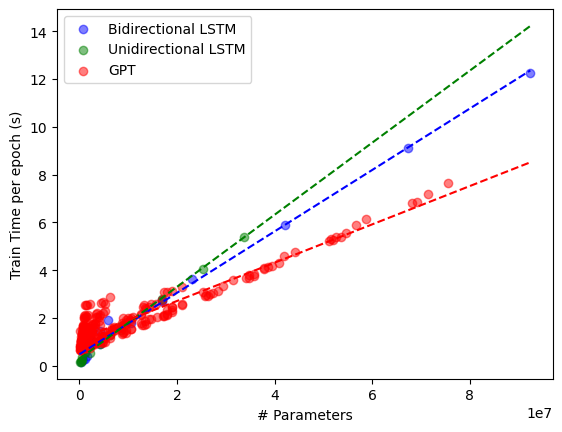

In [10]:
scatter(
    dfs=[data_lstm["small"].loc[data_lstm["small"]["bidirectional"] == True],
         data_lstm["small"].loc[data_lstm["small"]["bidirectional"] == False],
         data_gpt["small"]],
    x="params",
    y="mean_train_time",
    labels=["Bidirectional LSTM", "Unidirectional LSTM", "GPT"],
    xlabel="# Parameters",
    ylabel="Train Time per epoch (s)",
)

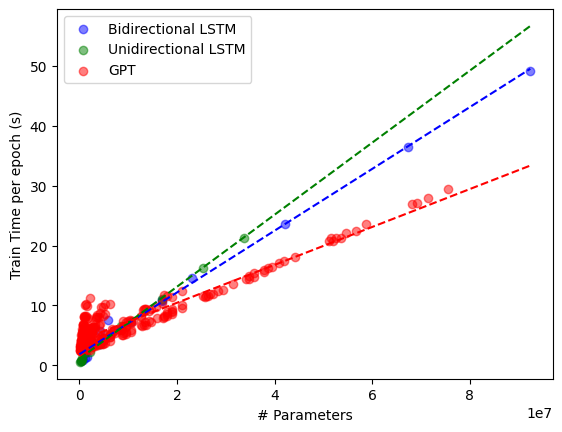

In [11]:
scatter(
    dfs=[data_lstm["medium"].loc[data_lstm["medium"]["bidirectional"] == True],
         data_lstm["medium"].loc[data_lstm["medium"]["bidirectional"] == False],
         data_gpt["medium"]],
    x="params",
    y="mean_train_time",
    labels=["Bidirectional LSTM", "Unidirectional LSTM", "GPT"],
    xlabel="# Parameters",
    ylabel="Train Time per epoch (s)",
)

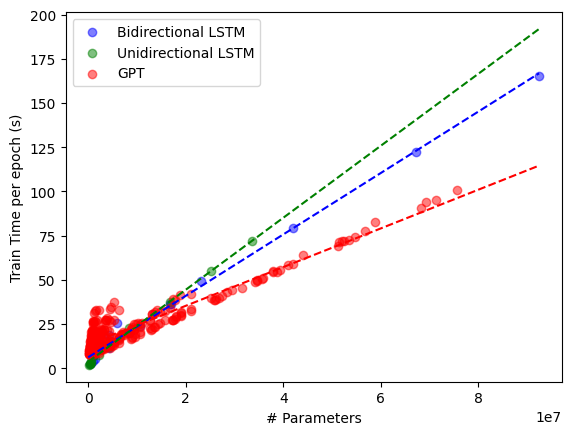

In [12]:
scatter(
    dfs=[data_lstm["large"].loc[data_lstm["large"]["bidirectional"] == True],
         data_lstm["large"].loc[data_lstm["large"]["bidirectional"] == False],
         data_gpt["large"]],
    x="params",
    y="mean_train_time",
    labels=["Bidirectional LSTM", "Unidirectional LSTM", "GPT"],
    xlabel="# Parameters",
    ylabel="Train Time per epoch (s)",
)

# Depth vs Train Loss

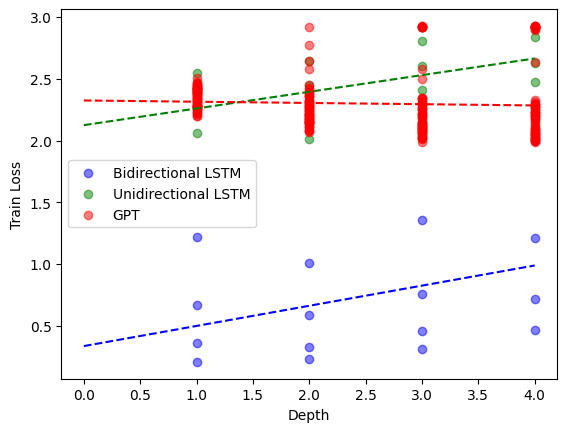

In [13]:
scatter(
    dfs=[data_lstm["small"].loc[data_lstm["small"]["bidirectional"] == True],
         data_lstm["small"].loc[data_lstm["small"]["bidirectional"] == False],
         data_gpt["small"]],
    x="depth",
    y="mean_train_loss",
    labels=["Bidirectional LSTM", "Unidirectional LSTM", "GPT"],
    xlabel="Depth",
    ylabel="Train Loss",
)

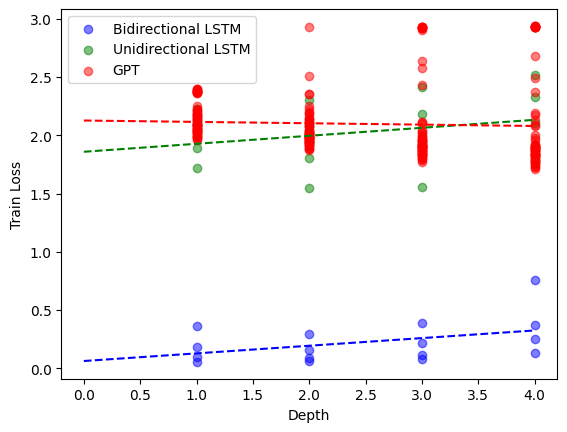

In [14]:
scatter(
    dfs=[data_lstm["medium"].loc[data_lstm["medium"]["bidirectional"] == True],
         data_lstm["medium"].loc[data_lstm["medium"]["bidirectional"] == False],
         data_gpt["medium"]],
    x="depth",
    y="mean_train_loss",
    labels=["Bidirectional LSTM", "Unidirectional LSTM", "GPT"],
    xlabel="Depth",
    ylabel="Train Loss",
)

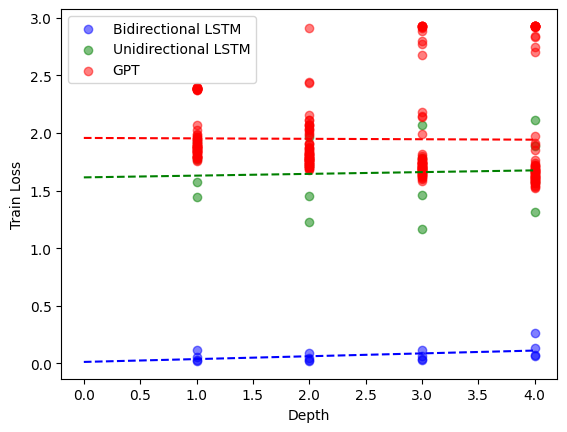

In [15]:
scatter(
    dfs=[data_lstm["large"].loc[data_lstm["large"]["bidirectional"] == True],
         data_lstm["large"].loc[data_lstm["large"]["bidirectional"] == False],
         data_gpt["large"]],
    x="depth",
    y="mean_train_loss",
    labels=["Bidirectional LSTM", "Unidirectional LSTM", "GPT"],
    xlabel="Depth",
    ylabel="Train Loss",
)

# Width vs Train Loss

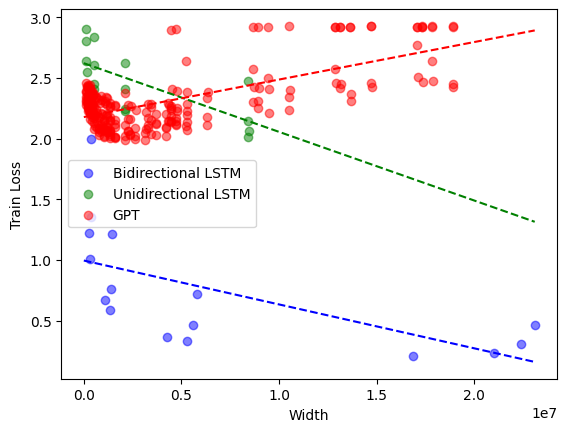

In [16]:
scatter(
    dfs=[data_lstm["small"].loc[data_lstm["small"]["bidirectional"] == True],
         data_lstm["small"].loc[data_lstm["small"]["bidirectional"] == False],
         data_gpt["small"]],
    x="width",
    y="mean_train_loss",
    labels=["Bidirectional LSTM", "Unidirectional LSTM", "GPT"],
    xlabel="Width",
    ylabel="Train Loss",
)

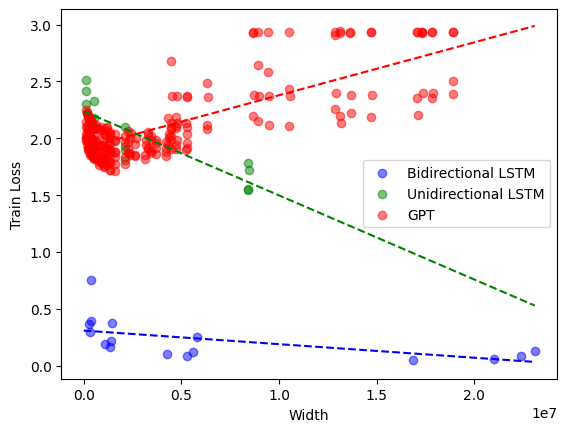

In [17]:
scatter(
    dfs=[data_lstm["medium"].loc[data_lstm["medium"]["bidirectional"] == True],
         data_lstm["medium"].loc[data_lstm["medium"]["bidirectional"] == False],
         data_gpt["medium"]],
    x="width",
    y="mean_train_loss",
    labels=["Bidirectional LSTM", "Unidirectional LSTM", "GPT"],
    xlabel="Width",
    ylabel="Train Loss",
)

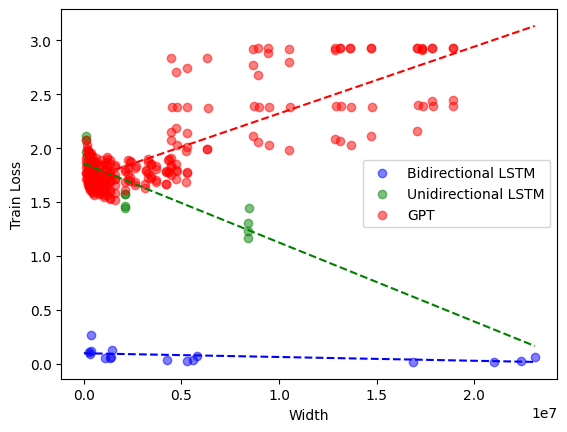

In [18]:
scatter(
    dfs=[data_lstm["large"].loc[data_lstm["large"]["bidirectional"] == True],
         data_lstm["large"].loc[data_lstm["large"]["bidirectional"] == False],
         data_gpt["large"]],
    x="width",
    y="mean_train_loss",
    labels=["Bidirectional LSTM", "Unidirectional LSTM", "GPT"],
    xlabel="Width",
    ylabel="Train Loss",
)

# Params vs Overfit Ratio

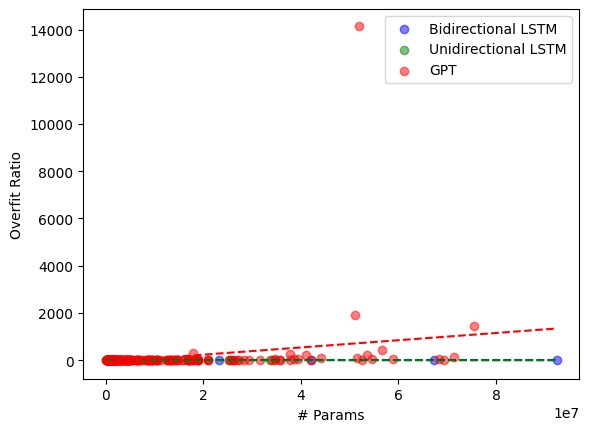

In [19]:
scatter(
    dfs=[data_lstm["small"].loc[data_lstm["small"]["bidirectional"] == True],
         data_lstm["small"].loc[data_lstm["small"]["bidirectional"] == False],
         data_gpt["small"]],
    x="params",
    y="overfit_ratio",
    labels=["Bidirectional LSTM", "Unidirectional LSTM", "GPT"],
    xlabel="# Params",
    ylabel="Overfit Ratio",
)

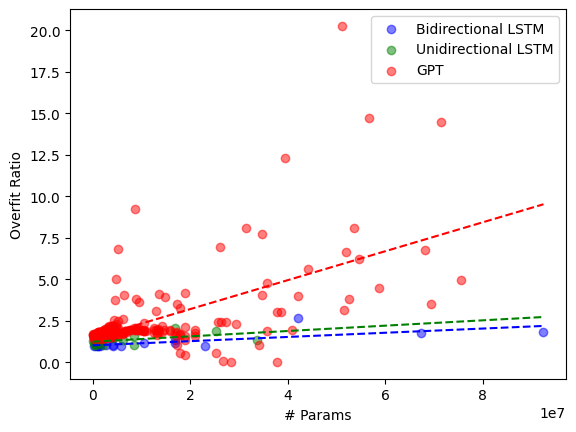

In [20]:
scatter(
    dfs=[data_lstm["medium"].loc[data_lstm["medium"]["bidirectional"] == True],
         data_lstm["medium"].loc[data_lstm["medium"]["bidirectional"] == False],
         data_gpt["medium"]],
    x="params",
    y="overfit_ratio",
    labels=["Bidirectional LSTM", "Unidirectional LSTM", "GPT"],
    xlabel="# Params",
    ylabel="Overfit Ratio",
)

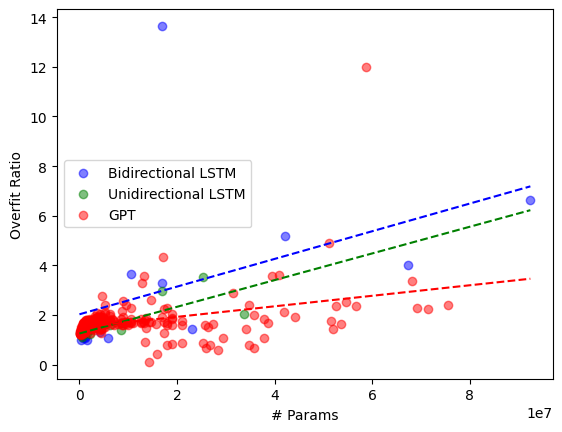

In [21]:
scatter(
    dfs=[data_lstm["large"].loc[data_lstm["large"]["bidirectional"] == True],
         data_lstm["large"].loc[data_lstm["large"]["bidirectional"] == False],
         data_gpt["large"]],
    x="params",
    y="overfit_ratio",
    labels=["Bidirectional LSTM", "Unidirectional LSTM", "GPT"],
    xlabel="# Params",
    ylabel="Overfit Ratio",
)

# Closest Params & Train Time

In [22]:
max_params = max([data_lstm["small"]["params"].max(), data_gpt["small"]["params"].max()])
min_params = min([data_lstm["small"]["params"].min(), data_gpt["small"]["params"].min()])

max_train_time = max([data_lstm["small"]["mean_train_time"].max(), data_gpt["small"]["mean_train_time"].max()])
min_train_time = min([data_lstm["small"]["mean_train_time"].min(), data_gpt["small"]["mean_train_time"].min()])

In [23]:
lstm_params = (max_params - data_lstm["small"]["params"].values) / (max_params - min_params)
gpt_params = (max_params - data_gpt["small"]["params"].values) / (max_params - min_params)

lstm_train_time = (max_train_time - data_lstm["small"]["mean_train_time"].values) / (max_train_time - min_train_time)
gpt_train_time = (max_train_time - data_gpt["small"]["mean_train_time"].values) / (max_train_time - min_train_time)

In [24]:
lstm_params

array([0.99817236, 0.99964337, 0.97243031, 0.98959167, 0.95534935,
       0.98389063, 0.9382684 , 0.97818958, 0.95515248, 0.97807312,
       0.8869174 , 0.95531331, 0.99389103, 0.81868232, 0.93255349,
       0.75044724, 0.90979368, 0.81828857, 0.90956075, 0.54552571,
       0.81861022, 0.27276286, 0.72765969, 0.99821256, 0.        ,
       0.63670916, 0.9896097 , 0.99678176, 0.98532837, 0.99535095,
       0.98951126, 0.99529272])

In [25]:
import numpy as np
def pairwise_distance_matrix(matrix1, matrix2):
    # Convert the matrices to NumPy arrays
    mat1 = np.array(matrix1)
    mat2 = np.array(matrix2)
    
    # Initialize the distance matrix
    distance_matrix = np.zeros((mat1.shape[0], mat2.shape[0]))
    
    # Calculate the Euclidean distance pairwise
    for i in range(mat1.shape[0]):
        for j in range(mat2.shape[0]):
            distance_matrix[i, j] = np.linalg.norm(mat1[i] - mat2[j])
    
    return distance_matrix

In [26]:
lstm_params_time = np.array([lstm_params, lstm_train_time]).transpose()
gpt_params_time = np.array([gpt_params, gpt_train_time]).transpose()

In [27]:
def argmin_distance(matrix1, matrix2):
    # Compute the distance matrix
    distance_matrix = pairwise_distance_matrix(matrix1, matrix2)
    
    # Find the indices of the minimum value in the distance matrix
    min_index = np.unravel_index(np.argmin(distance_matrix), distance_matrix.shape)
    
    return min_index

In [28]:
argmin_distance(lstm_params_time, gpt_params_time)

(5, 69)

In [29]:
data_lstm["small"].loc[5]

id                       13
params              1593885
depth                     3
width                531295
max_train_loss     2.974121
min_train_loss     2.284381
mean_train_loss    2.603092
overfit_ratio      1.145629
mean_train_time    0.758449
mean_val_time      0.079045
bidirectional         False
Name: 5, dtype: object

In [30]:
data_gpt["small"].loc[69]

id                      160
params              1606144
depth                     1
width               1606144
max_train_loss     2.690609
min_train_loss      2.07312
mean_train_loss     2.27818
overfit_ratio      1.867492
mean_train_time    0.740287
mean_val_time      0.116293
Name: 69, dtype: object